## Exploratory Data Analysis Sederhana Indeks Standar Pencemaran Udara DKI Jakarta Januari-Juli 2021
Notebook ini akan mengulas fenomena ISPU di DKI Jakarta pada periode Januari-Juli 2021. Data dapat diunduh melalui situs [Jakarta Open Data](https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021)

#### Import library yang diperlukan

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

sns.set()

warnings.filterwarnings('ignore')

#### Periksa dataset yang ada dalam folder __Dataset__

In [2]:
os.listdir('./Dataset')

['indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-januari-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2021.csv',
 'indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-mei-tahun-2021.csv']

#### Tampilkan salah satu file dataset sebagai contoh

In [3]:
df_sample = pd.read_csv('./Dataset/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2021.csv')

df_sample.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-03-01,62,97,45,13,38,18,97,PM25,SEDANG,DKI3
1,2021-03-02,55,81,50,17,53,28,81,PM25,SEDANG,DKI4
2,2021-03-03,59,83,46,21,50,35,83,PM25,SEDANG,DKI3
3,2021-03-04,62,103,45,19,49,31,103,PM25,TIDAK SEHAT,DKI4
4,2021-03-05,65,81,54,16,59,30,81,PM25,SEDANG,DKI2


#### Gabungkan seluruh dataset

In [4]:
df = pd.DataFrame()

for dataset in os.listdir('./Dataset'):
    temp = pd.read_csv(f'./Dataset/{dataset}')

    df = pd.concat([df, temp], sort=False)

#### Mengurutkan data berdasarkan tanggal

In [5]:
df = df.sort_values(by='tanggal')

#### 5 data teratas

In [6]:
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-01-01,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,2021-01-02,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,2021-01-03,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,2021-01-04,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,2021-01-05,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


#### 5 data terbawah

In [7]:
df.tail()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
26,2021-07-27,82,140.0,56,13,41,35,140,PM25,TIDAK SEHAT,DKI4
27,2021-07-28,82,145.0,53,18,40,45,145,PM25,TIDAK SEHAT,DKI4
28,2021-07-29,78,140.0,52,18,53,39,140,PM25,TIDAK SEHAT,DKI5
29,2021-07-30,90,154.0,54,15,81,35,154,PM25,TIDAK SEHAT,DKI4
30,2021-07-31,63,100.0,50,18,65,29,100,PM26,SEDANG,DKI4


In [8]:
df.shape

(212, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   212 non-null    object 
 1   pm10      212 non-null    int64  
 2   pm25      181 non-null    float64
 3   so2       212 non-null    int64  
 4   co        212 non-null    int64  
 5   o3        212 non-null    int64  
 6   no2       212 non-null    int64  
 7   max       212 non-null    int64  
 8   critical  212 non-null    object 
 9   categori  212 non-null    object 
 10  location  212 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 19.9+ KB


#### Parse tanggal kedalam tipe datetime

In [10]:
df.tanggal = pd.to_datetime(df.tanggal)

#### Periksa apakah ada data yang duplikat

In [11]:
df[df.duplicated() == True]

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 30
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   212 non-null    datetime64[ns]
 1   pm10      212 non-null    int64         
 2   pm25      181 non-null    float64       
 3   so2       212 non-null    int64         
 4   co        212 non-null    int64         
 5   o3        212 non-null    int64         
 6   no2       212 non-null    int64         
 7   max       212 non-null    int64         
 8   critical  212 non-null    object        
 9   categori  212 non-null    object        
 10  location  212 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 19.9+ KB


#### Missing value
Sebagian besar kolom memiliki jumlah baris data 212, sedangkan pada kolom pm25 hanya 181. Hal tersebut menandakan bahwa terdapat data yang hilang. Ketimbang melakukan drop pada kolom tersebut, missing value lebih baik digantikan dengan nilai rata-rata pm25

In [13]:
df['pm25'] = df['pm25'].fillna(df['pm25'].mean()) 

#### Unique value pada kolom _critical_

In [14]:
df.critical.unique()

array(['O3', 'PM25', 'PM10', 'PM26'], dtype=object)

#### Unique value pada kolom category

In [15]:
df.categori.unique()

array(['SEDANG', 'TIDAK SEHAT'], dtype=object)

#### Informasi

Berdasarkan Peraturan Menteri Lingkungan Hidup dan Kehutanan Republik Indonesia 
No P.14/MENLHK/SETJEN/KUM.1/7/2020 tentang Indeks Standar Pencemaran Udara (ISPU)
tercantum bahwa ada beberapa parameter seperti: 

<table>
    <tr>
        <td>Parameter</td>
        <td>Simbol</td>
    </tr>
    <tr>
        <td>Partikulat</td>
        <td>PM<sub>10</sub></td>
    </tr>
    <tr>
        <td>Partikulat</td>
        <td>PM<sub>2.5</sub></td>
    </tr>
    <tr>
        <td>Karbon Monoksida</td>
        <td>CO</td>
    </tr>
    <tr>
        <td>Nitrogen Dioksida</td>
        <td>NO<sub>2</sub></td>
    </tr>
    <tr>
        <td>Sulfur Dioksida</td>
        <td>SO<sub>2</sub></td>
    </tr>
    <tr>
        <td>Ozon</td>
        <td>O<sub>3</sub></td>
    </tr>
     <tr>
        <td>Hidrokarbon</td>
        <td>HC</td>
    </tr>
</table>

Polutan dapat dikelompokkan dalam angka rentang ISPU sebagai berikut:

<table>
    <tr>
        <th>Kategori</th>
        <th>Angka Rentang</th>
    </tr>
    <tr>
        <td>Baik</td>
        <td>1-50</td>
    </tr>
    <tr>
        <td>Sedang</td>
        <td>51-100</td>
    </tr>
    <tr>
        <td>Tidak Sehat</td>
        <td>101-200</td>
    </tr>
    <tr>
        <td>Sangat Tidak Sehat</td>
        <td>201-300</td>
    </tr>
    <tr>
        <td>Berbahaya</td>
        <td>301 >=</td>
    </tr>
</table>

Terdapat nama kolom dataset _pm25_ yang seharusnya _pm2.5_, maka kolom tersebut kita ganti saja menjadi _pm2.5_

#### Ubah nama kolom agar sesuai

In [16]:
df = df.rename(columns={'pm25': 'pm2.5', 'categori': 'category'})

#### Cek kembali data yang diubah tersebut

In [17]:
df.describe()

,pm10,pm2.5,so2,co,o3,no2,max
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,61.084906,96.646409,52.518868,16.825472,51.594340,36.481132,94.575472
std,15.014444,24.320468,12.761562,6.077128,13.091568,18.765821,26.127811
min,24.000000,44.000000,37.000000,8.000000,20.000000,13.000000,51.000000
25%,53.750000,81.750000,43.000000,12.750000,42.000000,24.000000,75.000000
50%,63.000000,96.646409,52.000000,16.000000,51.000000,31.000000,93.000000
75%,69.250000,108.000000,55.000000,20.000000,59.000000,41.000000,108.250000
max,95.000000,174.000000,126.000000,47.000000,151.000000,134.000000,174.000000


#### Unique value pada kolom location

In [18]:
df.location.unique()

array(['DKI2', 'DKI3', 'DKI5', 'DKI4'], dtype=object)

In [19]:
df[df.critical == 'PM26']

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location
30,2021-07-31,63,100.0,50,18,65,29,100,PM26,SEDANG,DKI4


Seperti yang terlihat diatas terdapat critical emisi PM26, dimana cemaran tersebut bisa saja merupakan _typo_ yang seharusnya PM2.5. Kita tidak dapat berasumsi karena tidak ada informasi pendukung sehingga baris tersebut lebih baik
untuk di drop

In [20]:
df = df[df.critical != 'PM26']

Terdapat 1 baris yang didrop, sehingga baris berkurang dari 212 menjadi 211

#### Dimensi data

In [21]:
df.shape

(211, 11)

#### Nilai null

In [22]:
df.isnull().sum()

tanggal     0
pm10        0
pm2.5       0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
category    0
location    0
dtype: int64

#### Korelasi antar variabel

<AxesSubplot:>

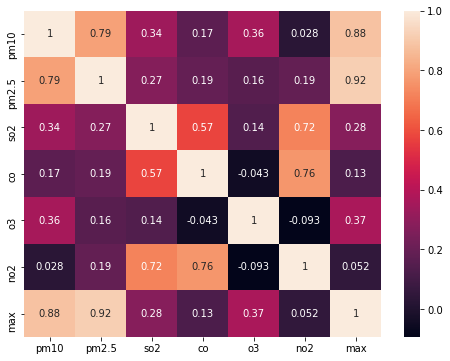

In [23]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), annot=True)

#### Grafik perubahan data

<AxesSubplot:xlabel='tanggal'>

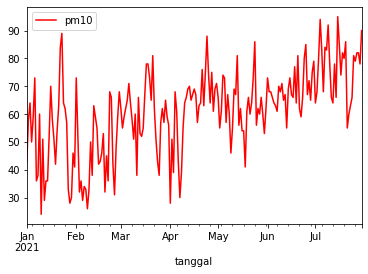

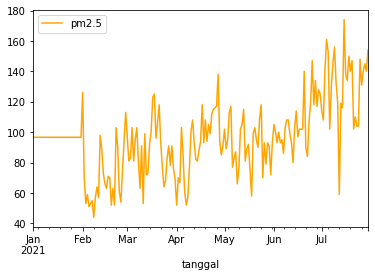

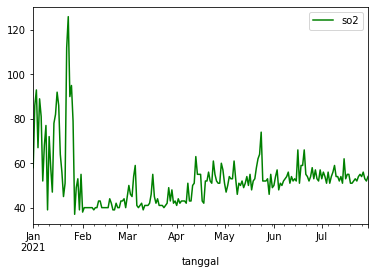

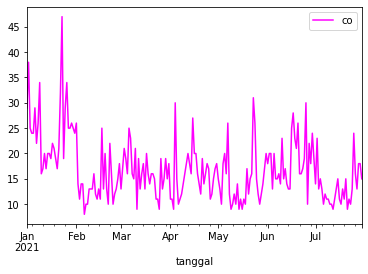

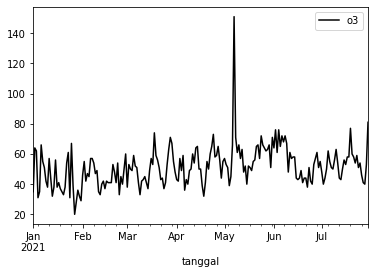

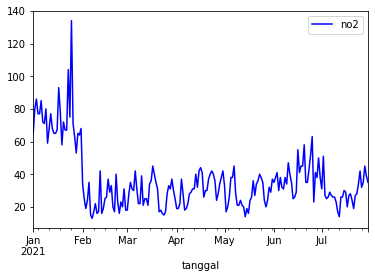

In [50]:
df_resample = (df.set_index('tanggal')).resample('D').mean().reset_index()

df_resample.plot(x='tanggal', y='pm10', kind='line', color='red')
df_resample.plot(x='tanggal', y='pm2.5', kind='line', color='orange')
df_resample.plot(x='tanggal', y='so2', kind='line', color='green')
df_resample.plot(x='tanggal', y='co', kind='line', color='magenta')
df_resample.plot(x='tanggal', y='o3', kind='line', color='black')
df_resample.plot(x='tanggal', y='no2', kind='line', color='blue')

dapat kita lihat bahwa kolom _max_ memiliki korelasi yang erat dengan kolom _pm2.5_ dengan _pm10_

#### Kategori kualitas udara

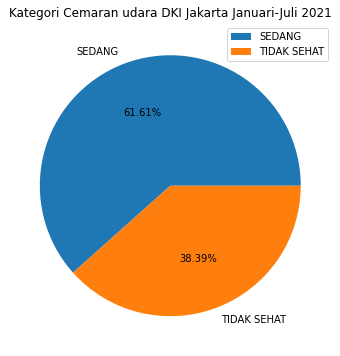

In [25]:
plt.figure(figsize=(8,6))

plt.pie(df.category.value_counts(), labels=df.category.value_counts().index, autopct='%.2f%%')

plt.title('Kategori Cemaran udara DKI Jakarta Januari-Juli 2021')
plt.legend()
plt.show()

#### Persentase kota dengan status tidak sehat

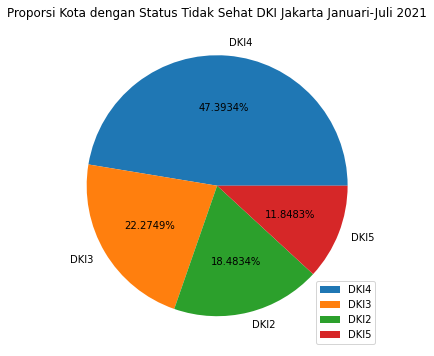

In [48]:
plt.figure(figsize=(8,6))

df_group = df[df.category == 'TIDAK SEHAT']

plt.pie(df.location.value_counts(), labels=df.location.value_counts().index, autopct='%.4f%%')
plt.title('Proporsi Kota dengan Status Tidak Sehat DKI Jakarta Januari-Juli 2021')
plt.legend()
plt.show()

#### Sebaran data menurut wilayah

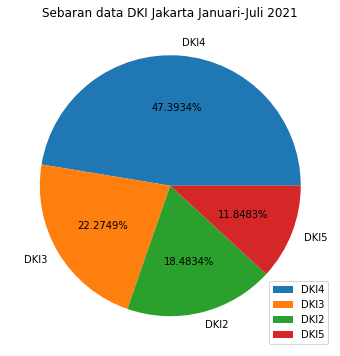

In [26]:
plt.figure(figsize=(8,6))

plt.pie(df.location.value_counts(), labels=df.location.value_counts().index, autopct='%.4f%%')
plt.title('Sebaran data DKI Jakarta Januari-Juli 2021')
plt.legend()
plt.show()

#### Sebaran polutan

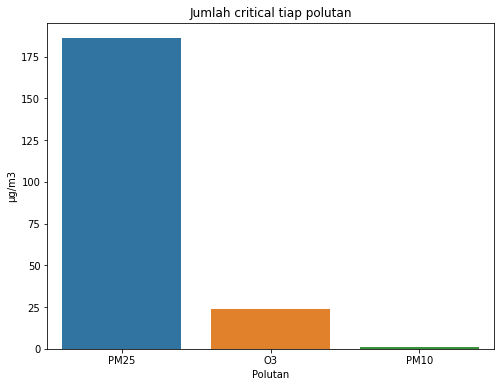

In [27]:
plt.figure(figsize=(8,6))

sns.barplot(x=df.critical.value_counts().index, y=df.critical.value_counts())

plt.title('Jumlah critical tiap polutan')
plt.xlabel('Polutan')
plt.ylabel('µg/m3')
plt.show()


#### Agregasi data untuk mendapatkan rerata polutan per daerah

In [28]:
df_agg = df.copy()

pollutant = ['pm10', 'pm2.5', 'so2', 'co', 'o3', 'no2']

df_agg = pd.pivot_table(data=df_agg, index=['location'], values=pollutant, aggfunc='mean').round().reset_index()

In [29]:
df_agg['category'] = pd.Series()

for index, row in enumerate(df_agg.itertuples()):
    temp_treeshold = 0
    for cell in row:
        if type(cell) == int or type(cell) == float:
            if cell > temp_treeshold:
                if cell in range(1,50):
                    df_agg.category.loc[index] = 'BAIK'
                elif cell in range(51,100):
                    df_agg.category.loc[index] = 'SEDANG'
                elif cell in range(101,200):
                    df_agg.category.loc[index] = 'TIDAK SEHAT'
                elif cell in range(201,300):
                    df_agg.category.loc[index] = 'SANGAT TIDAK SEHAT'
                else:
                    df_agg.category.loc[index] = 'BERBAHAYA'

                temp_treeshold = cell

df_agg

,location,co,no2,o3,pm10,pm2.5,so2,category
0,DKI2,19.0,52.0,46.0,51.0,88.0,56.0,SEDANG
1,DKI3,18.0,37.0,50.0,58.0,86.0,55.0,SEDANG
2,DKI4,15.0,31.0,55.0,67.0,106.0,51.0,TIDAK SEHAT
3,DKI5,18.0,33.0,50.0,61.0,93.0,48.0,SEDANG


#### Apakah weekend mempengaruhi status kategori cemaran udara ?

In [30]:
df_temp = df.sort_values(by='max', ascending=False).head(20).sort_values(by='tanggal')

df_temp['dayweek'] = df_temp.tanggal.dt.dayofweek

df_temp['weekend'] = [True if x > 5 else False for x in df_temp.dayweek]

df_temp

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location,dayweek,weekend
24,2021-01-25,62,96.646409,95,29,67,134,134,O3,TIDAK SEHAT,DKI2,0,False
26,2021-04-27,75,138.000000,51,12,65,28,138,PM25,TIDAK SEHAT,DKI4,1,False
6,2021-05-07,67,83.000000,61,26,151,45,151,O3,TIDAK SEHAT,DKI3,4,False
19,2021-06-20,81,140.000000,66,26,44,58,140,PM25,TIDAK SEHAT,DKI4,6,True
24,2021-06-25,85,147.000000,58,30,40,63,147,PM25,TIDAK SEHAT,DKI4,4,False
2,2021-07-03,80,141.000000,54,13,44,27,141,PM25,TIDAK SEHAT,DKI4,5,False
3,2021-07-04,94,161.000000,51,15,50,25,161,PM25,TIDAK SEHAT,DKI4,6,True
4,2021-07-05,83,153.000000,56,13,62,26,153,PM25,TIDAK SEHAT,DKI4,0,False
7,2021-07-08,83,145.000000,56,11,50,26,145,PM25,TIDAK SEHAT,DKI4,3,False
8,2021-07-09,92,156.000000,59,11,56,26,156,PM25,TIDAK SEHAT,DKI4,4,False


In [31]:
df_temp.weekend.value_counts()

False    16
True      4
Name: weekend, dtype: int64

In [55]:
df_temp = df.sort_values(by='max', ascending=False).tail(20).sort_values(by='tanggal')

df_temp['dayweek'] = df_temp.tanggal.dt.dayofweek

df_temp['weekend'] = [True if x > 5 else False for x in df_temp['dayweek']]

df_temp

,tanggal,pm10,pm2.5,so2,co,o3,no2,max,critical,category,location,dayweek,weekend
9,2021-01-10,24,96.646409,39,16,38,59,59,O3,SEDANG,DKI2,6,True
18,2021-01-19,42,96.646409,56,19,35,58,58,O3,SEDANG,DKI2,1,False
27,2021-01-28,28,96.646409,49,25,28,53,53,O3,SEDANG,DKI2,3,False
2,2021-02-03,32,53.000000,40,11,42,19,53,PM25,SEDANG,DKI3,2,False
3,2021-02-04,36,59.000000,40,14,47,24,59,PM25,SEDANG,DKI5,3,False
4,2021-02-05,29,51.000000,40,14,45,35,51,PM25,SEDANG,DKI3,4,False
5,2021-02-06,34,53.000000,40,8,57,15,57,O3,SEDANG,DKI2,5,False
6,2021-02-07,33,55.000000,40,10,57,13,57,O3,SEDANG,DKI2,6,True
7,2021-02-08,26,44.000000,39,10,54,17,54,O3,SEDANG,DKI2,0,False
8,2021-02-09,33,57.000000,40,13,47,22,57,PM25,SEDANG,DKI4,1,False


In [56]:
df_temp.weekend.value_counts()

False    17
True      3
Name: weekend, dtype: int64

#### Sampling weekend

In [69]:
df['dayweek'] = df.tanggal.dt.dayofweek

df['weekend'] = [True if x > 5 else False for x in df['dayweek']]

In [81]:
tidak_sehat_sample = pd.DataFrame()

for i in range(20):
    tidak_sehat_sample = tidak_sehat_sample.append(df[df.category == 'TIDAK SEHAT'].sample(50))

In [83]:
tidak_sehat_sample.weekend.value_counts()

False    846
True     154
Name: weekend, dtype: int64

#### Kesimpulan

1. Cemaran PM10 & PM25 cenderung meningkat dari Januari hingga Juli 2021. Tren menurun cenderung terjadi pada pertengahan bulan dan menjelang pergantian bulan 

2. Kenaikan tinggi cemaran SO2 hingga 125 µg/m3 terjadi pada minggu ke-3 Januari 2021 dan menurun drastis. Pada minggu ke-4 Januari 2021 hingga dibawah 40 µg/m3. Pada bulan-bulan berikutnya kenaikan cemaran SO2 tidak terlalu signifikan

3. Cemaran CO mengalami kenaikan hingga mencapai angka 47 µg/m3 minggu ke-3 Januari 2021.Penurunan terjadi pada Februari 2021 hingga dibawah 10 µg/m3. Pada bulan-bulan berikutnya terjadi naik dan turun di rentang 10 µg/m3 hingga 30 µg/m3  

4. Cemaran O3 tertinggi pada minggu ke-1 Mei 2021 pada angka 145 µg/m3. Selebihnya angka 
naik dan turun stabil pada rentang 20 µg/m3 hingga 60 µg/m3

5. Kenaikan hingga angka 130 µg/m3 terjadi pada cemaran NO2 di minggu ke-3 Januari 2021 dan kembali turun ke kisaran angka 20 µg/m3 pada awal Februari 2021. Pada bulan-bulan berikutnya naik dan turun pada rentang 15 µg/m3 hingga 60 µg/m3

6. Dalam rentang waktu observasi terdapat 61,61% kategori cemaran sehat dan 38,39% tidak sehat. Dari angka kategori tidak sehat, 47,39% berasal dari DKI4, 22,275% DKI3, 18,48% DKI2 dan 11,85% DKI5

7. Dengan mengambil 50 item sample data dengan kategori 'TIDAK SEHAT' dan iterasi sebanyak 20 
pada tiap sample, didapatkan 846 (81,797%) bukan weekend dan 154 (18,203%) adalah weekend 